# Extract the values from the .txt file

### 1.1 Data extraction

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


airfoils = ["SC(2)-0714", "NACA2210", "NACA2312", "NACA65(1)-212"]
machs = ["07", "02"]

airfoils_name = sorted(["SC(2)-0714", "NACA 2210", "NACA 2312", "NACA 65(1)-212"])

naca_digits = 4
titles = 10


In [3]:
for file in os.listdir("airfoils\\raw_data"):
    new_name = file[:3]
    print(file)
    #os.rename()

M02_NACA2210.txt
M02_NACA2312.txt
M02_NACA65(1)-212.txt
M02_SC(2)-0714.txt
M07_NACA2210.txt
M07_NACA2312.txt
M07_NACA65(1)-212.txt
M07_SC(2)-0714.txt


### 1.2 <span style="color:white">  Create CSV files for all the airfoils and mach numbers in the lists</span>.

In [4]:
for airfoilname in airfoils:
    for M in machs:

        filename = "airfoils/raw_data/M" + M + "_" + airfoilname + ".txt" # this file is the main file
        csv_file = "airfoils/csv/M" + M + "_" + airfoilname + ".csv"
        graphsave = "airfoils/graphs/" + airfoilname + M + ".svg"

        with open(filename, 'r') as file:
            lines = file.readlines()
            columns = lines[titles-1].strip().split()

            lst = []
            for line in lines[11:]:
                line = line.strip().split()
                lst.append(line)  
                

        with open(csv_file, 'w') as f:
            csv_writer = csv.writer(f)
            csv_writer.writerow(columns)
            csv_writer.writerows(lst)
            
files = os.listdir("airfoils/csv")

## 2. Analyse airfoils for each value

##### Plotting the CL/alpha

M02_NACA2210
0.09992
M02_NACA2312
0.10606666666666666
M02_NACA65(1)-212
0.11288000000000001
M02_SC(2)-0714
0.13363999999999998
M07_NACA2210
0.1748
M07_NACA2312
0.19976


IndexError: index 6 is out of bounds for axis 0 with size 6

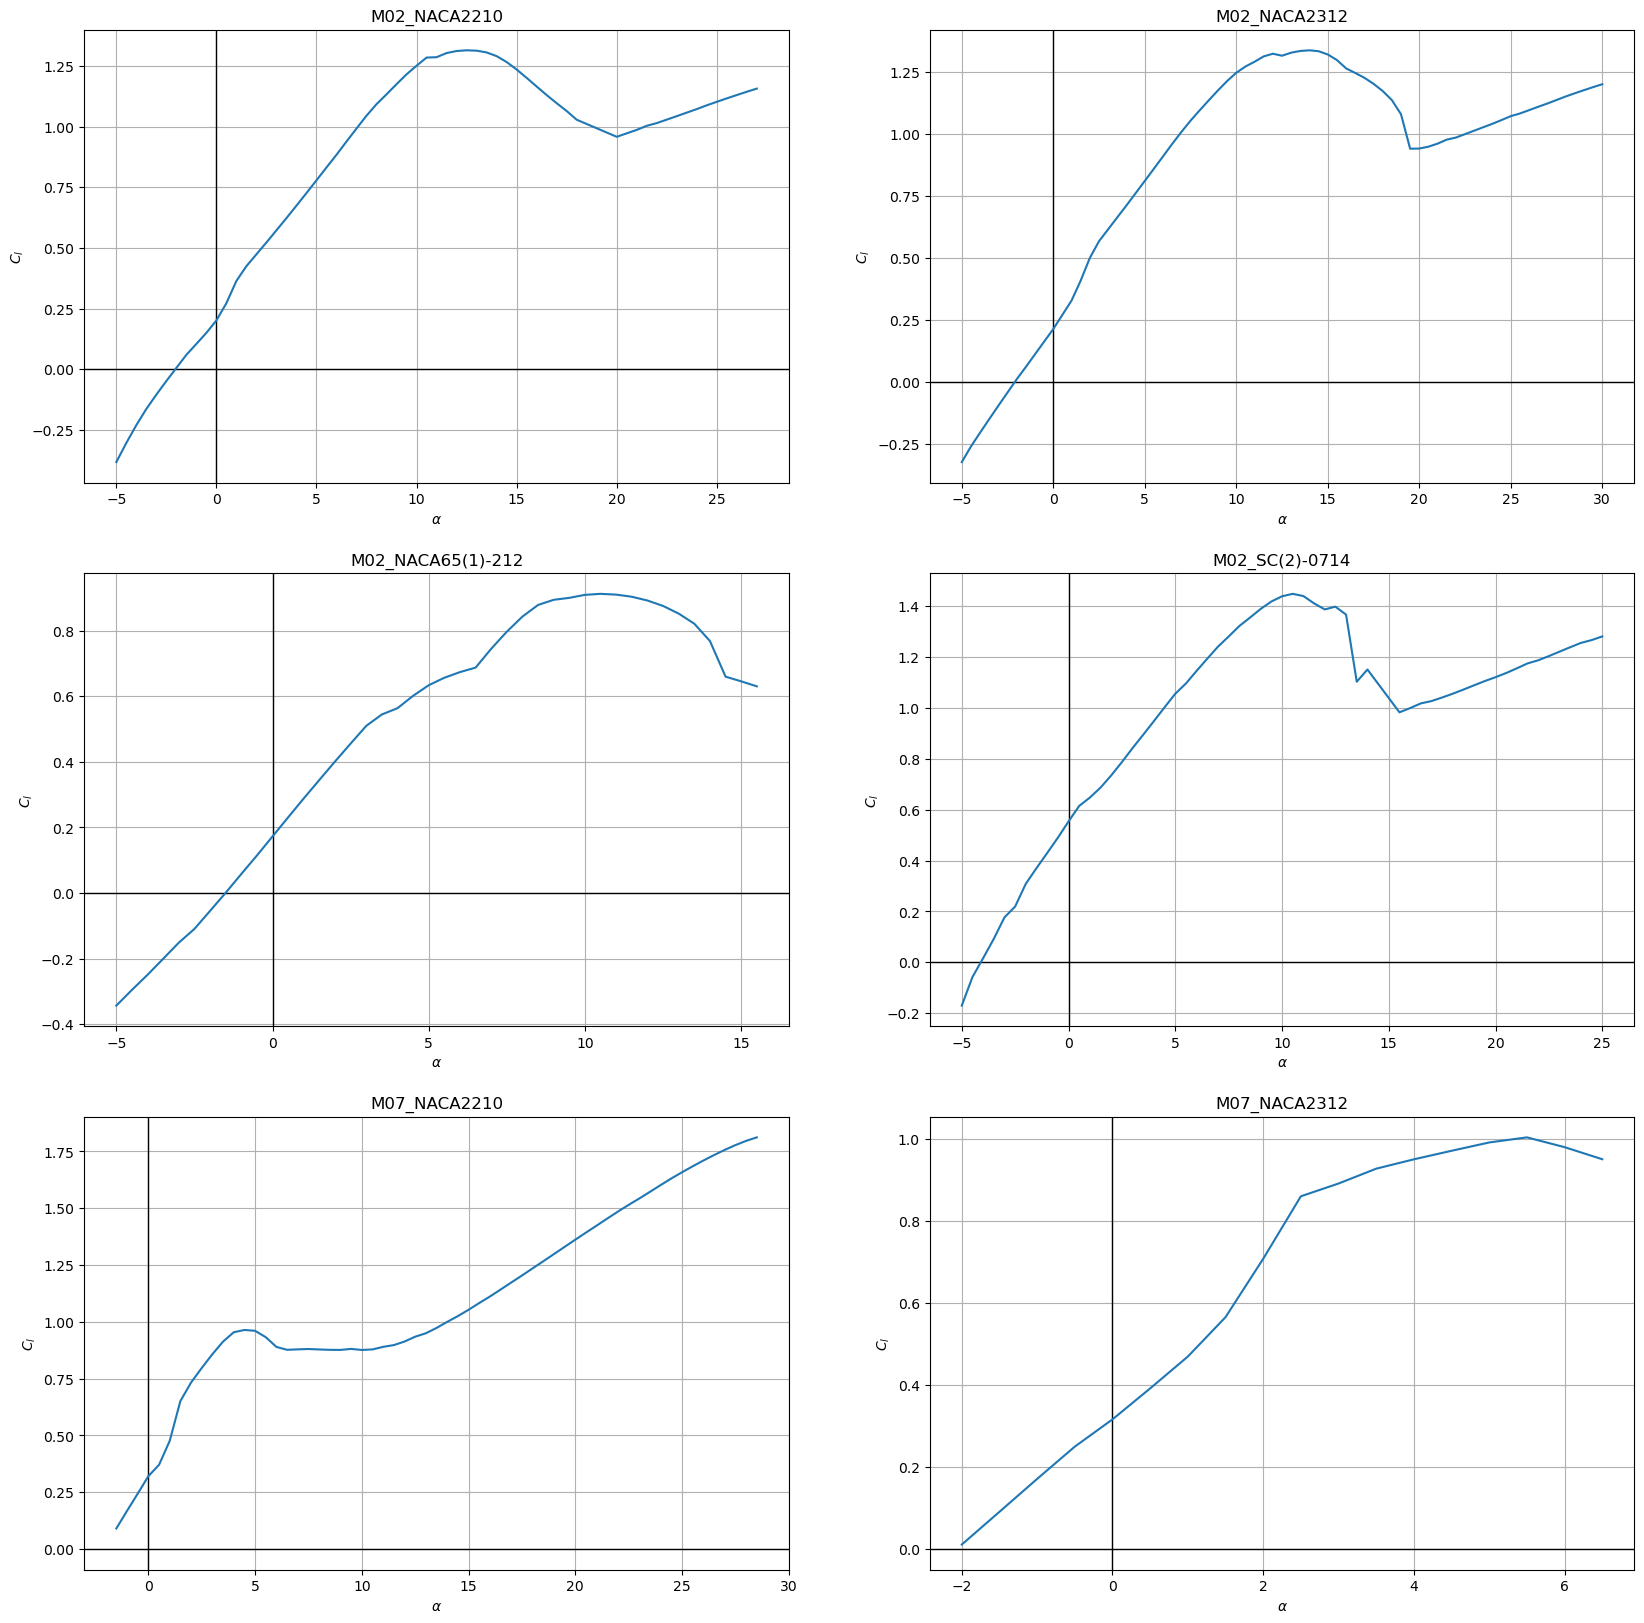

In [5]:
fig, axs = plt.subplots(3, 2,figsize=(20, 20))
for index, file in enumerate(files):
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    
    axs.flat[index].grid(True)
    axs.flat[index].set_xlabel("$\\alpha$")
    axs.flat[index].set_ylabel("$C_l$")
    #axs.flat[index].set_xlim(-5, 10)
    
    axs.flat[index].set_title(f'{file[:-4]}')
    axs.flat[index].axhline(linewidth=1, color="k")
    axs.flat[index].axvline(linewidth=1, color="k")
    
    print(file[:-4])
    print((df["CL"][10] - df["CL"][5])/(df["alpha"][10] - df["alpha"][5]))
    axs.flat[index].plot(df["alpha"], df["CL"])


plt.tight_layout()
plt.show()
    

## 2.2 Graph CL - $\alpha$ curves for the four airfoils

### 2.2.1 Mach 0.2

1.315
1.3389
0.9125
1.4477


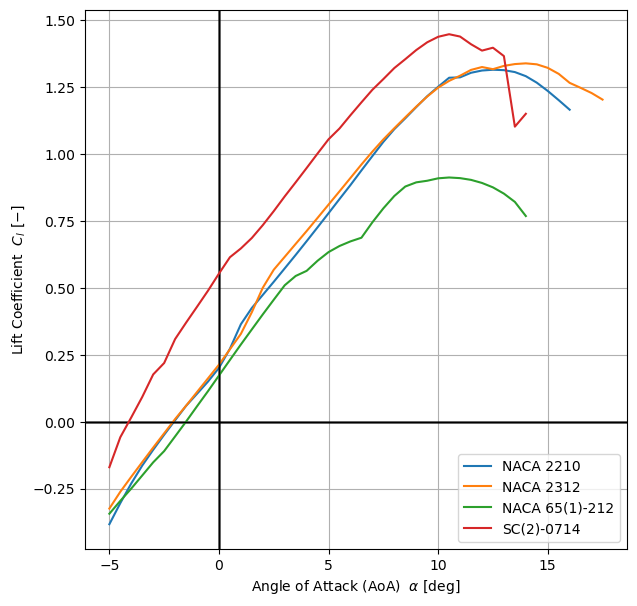

In [6]:
fig, axs = plt.subplots(figsize=(7, 7))

for index, file in enumerate(files[:4]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    
    max_index = df["CL"].idxmax()
    print(df["CL"][max_index])
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    
    #axs.set_title(f'{file[:-4]}')
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"], df["CL"], label = airfoils_name[index])

axs.legend()

#plt.savefig("airfoils/graphs/M02_CL-alpha.svg")
#plt.tight_layout()
plt.show()


### 2.2.2 Mach 0.7

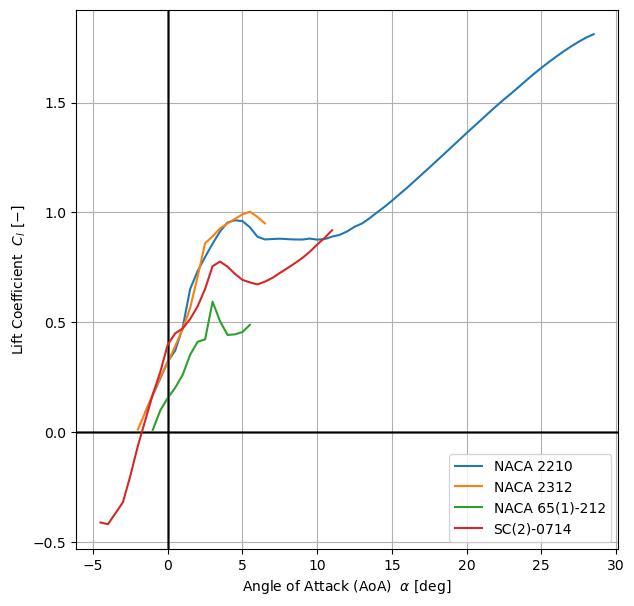

In [83]:
fig, axs = plt.subplots(figsize=(7, 7))
airfoils_maxcl =[]
for index, file in enumerate(files[4:]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))

    max_index = df["CL"].idxmax()
    #print(f"C_l max for {airfoils_name[index]} is {df["CL"][max_index]}" )
    airfoils_maxcl.append(df["CL"][max_index])
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"], df["CL"], label = airfoils_name[index])

axs.legend()

#plt.savefig("graphs/M07_CL-alpha.svg")
#plt.tight_layout()
plt.show()


In [84]:
from planform import AR, halveCordSweep, V_cr
beta = np.sqrt(1-V_cr**2)
eta = 0.95
alpha_0l = np.radians(-2.0)
cl_max = airfoils_maxcl[-1]

alphas = np.radians(np.linspace(-5, 20))
dclalpha = 2*np.pi*AR/(2+np.sqrt(4+((AR*beta/eta)**2))*(1+((np.tan(halveCordSweep))**2)/(beta**2)))

print(dclalpha*np.pi/180)
print("dclalpha = "+ str(dclalpha) + "  [1/rad]")

CL = dclalpha*(alphas-alpha_0l)
x = np.degrees(alphas)

0.09139066106426803
dclalpha = 5.236299165893139  [1/rad]


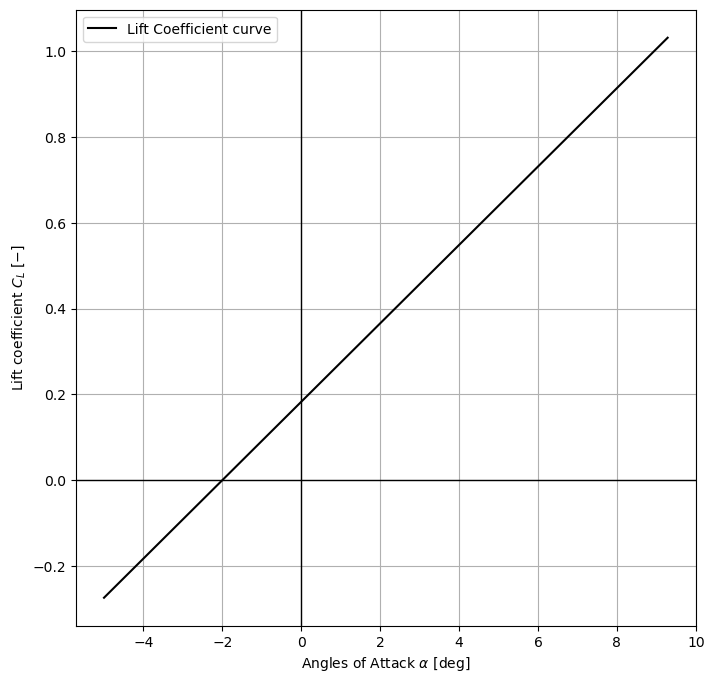

<Figure size 640x480 with 0 Axes>

In [85]:
fig, axs = plt.subplots(figsize=(8, 8))
axs.grid(True)
axs.axhline(linewidth=1, color="k")
axs.axvline(linewidth=1, color="k")
df = pd.DataFrame(x[:29], CL[:29])

axs.plot(x[:28+1], CL[:28+1], color='black', label = r'Lift Coefficient curve')
axs.set_xlabel(r'Angles of Attack $\alpha \ [\deg]$')
axs.set_ylabel(r'Lift coefficient $C_L \ [-]$')
plt.legend()
plt.show()
plt.clf()


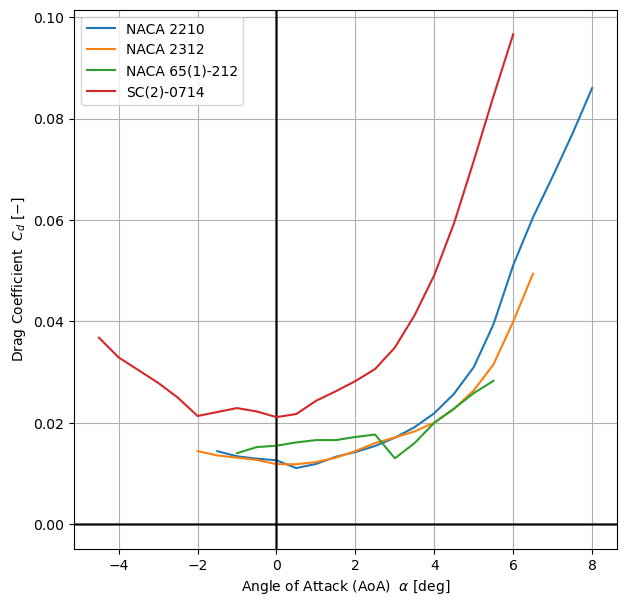

,alpha,CL,CD,CDp,Cm,Top,Xtr,Bot,Xtr.1,Cpmin,Chinge,XCp
0,-4.5,-0.4117,0.03680,0.03235,-0.0947,0.9225,0.0866,-2.6277,0.0,0.0,0.0,0.0050
1,-4.0,-0.4198,0.03290,0.02807,-0.0847,0.9057,0.0906,-2.5790,0.0,0.0,0.0,0.0349
2,-3.0,-0.3200,0.02789,0.02247,-0.0708,0.8785,0.1095,-2.1391,0.0,0.0,0.0,0.0161
3,-2.5,-0.1987,0.02497,0.01952,-0.0768,0.8706,0.1471,-1.7726,0.0,0.0,0.0,-0.1526
4,-2.0,-0.0635,0.02135,0.01739,-0.0947,0.8551,0.4830,-1.4409,0.0,0.0,0.0,-1.2782
5,-1.0,0.1718,0.02291,0.01897,-0.0857,0.8158,0.5919,-0.8221,0.0,0.0,0.0,0.7525
6,-0.5,0.2733,0.02224,0.01832,-0.0776,0.7740,0.6106,-0.9985,0.0,0.0,0.0,0.5335
7,0.0,0.3981,0.02113,0.01719,-0.0778,0.7110,0.6335,-1.2777,0.0,0.0,0.0,0.4430
8,0.5,0.4495,0.02173,0.01665,-0.0645,0.4412,0.6406,-1.5097,0.0,0.0,0.0,0.3897
9,1.0,0.4717,0.02433,0.01834,-0.0564,0.2109,0.6526,-1.6832,0.0,0.0,0.0,0.3648


In [91]:
fig, axs = plt.subplots(figsize=(7, 7))

for index, file in enumerate(files[4:]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    #max_index = df["CL"].idxmax()
    #df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Drag Coefficient  $C_d \ [-]$", fontsize = 10)
    
    #axs.set_title(f'{file[:-4]}')
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"][:20], df["CD"][:20], label = airfoils_name[index])

axs.legend()

plt.savefig("airfoils/graphs/M07_CD-alpha.svg")
#plt.tight_layout()
plt.show()
df
